In [103]:
import pandas as pd
import numpy as np
from optbinning import OptimalBinning

# Traitement des données

## Import des données

In [104]:
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

In [105]:
liste_var = ['AMI', 'regroup_natur_op' , 'fl_fonc', 'fl_prt_Conso', 'nb_empr_ope' , 'niv_gravite_mtf_dfs', 'CD_MTF_DFC', 'sol_echec', 'fam_PCD', 'solution', 'dat_dec_echec', 'NB_RP_HOP', 'CD_DNE_CHR_LGD_SAIN', 'CD_SITFAM_EMP1', 'CD_CSP_EMP1', 'CD_ETAT_CIVIL', 'CD_NATUR_OP_PFI', 'MT_CHA_CSM_REV', 'MT_CHA_IMP', 'MT_CHA_PIP', 'MT_CHA_PIV', 'mt_rev_dispo', 'MT_CHG_MSL', 'MT_REST_VIVRE', 'ANC_BANC_MAX_PFI', 'TX_ENDET', 'CD_MTF_ENE_CTX', 'MT_PATRIM_NET', 'ANC_PRO_MAX_PFI', 'MT_CHA_HORS_OPE_PFI', 'NB_CHARGE_HORS_OPE_PFI', 'max_age_ctx', 'EAD_1an_avant_def', 'MT_REV_PFI', 'TX_APPOR', 'cum_frs_externes', 'MT_PATRIM_MOB', 'AGE_EMP1', 'dls_ges_def', 'NB_DUR_PFI', 'mt_dec_cum_IMP_tot', 'MT_FMG', 'MT_EAD_RESID', 'cum_dec', 'nb_bienHOP', 'dls_mep_entree_def', 'CD_POST_BIEN_PFI', 'cum_rec', 'MT_EAD_DNE_CHR_d', 'MR_arr', 'NB_LO_HOP','fl_pass_DET', 'arrete', 'cd_op','date_entree_defaut', 'NB_DUR_PFI','fl_prise_de_gar','PTG','CD_NATUR_OP_PFI',
'regroup_natur_op','DT_MEP_OPE','nb_prt','FL_REL_NON_ANNULE']

In [106]:
liste_var = list(set(liste_var))

In [107]:
df = df[liste_var]

## Traitement des types de variables
##### Passage des variables numériques ayant moins de 10 valeurs uniques en catégorie

In [108]:
filtre = (df.select_dtypes(include = 'number').nunique()<10)

for col in df.select_dtypes(include = 'number').loc[:,filtre].columns:
    df[col] = df[col].astype('object')

In [109]:
df['fl_pass_DET'] = df['fl_pass_DET'].astype('int')

##### Traitement des variables de types Datetime

In [110]:
df['arrete'] = pd.to_datetime(df['arrete'])
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_8505/2107458667.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_8505/2107458667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])


In [111]:
df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')

In [112]:
df['DT_MEP_OPE'] = df['arrete'] - df['DT_MEP_OPE'] # Pour récupérer l'information de la recence du prêt
df['DT_MEP_OPE'] = df['DT_MEP_OPE'].dt.days

##### Création d'une variable DET indiquant dans la première ligne le passage en DET

In [113]:
liste_det = df[df['fl_pass_DET'] == 1]['cd_op']
df['DET'] = np.where(df['cd_op'].isin(liste_det), 1, 0)

## Traitement des anomalies
##### Suppression des individus n’ayant qu’une ligne

In [114]:
anomalie = (df['cd_op'].value_counts() ==1)
anomalie = pd.DataFrame(anomalie)
liste_anomalie = anomalie[anomalie['count']==True].index

In [115]:
df['anomalie'] = np.where(df['cd_op'].isin(liste_anomalie), 1, 0)

In [116]:
df = df[df['anomalie'] == 0]

In [117]:
df.drop(columns = ['fl_pass_DET','anomalie'], inplace = True)

##### Récupération de la première ligne de chaque individu

In [118]:
df_ph = df.drop_duplicates(subset = 'cd_op' , keep = 'last')
df = df.drop_duplicates(subset = 'cd_op' , keep = 'first')

In [119]:
df_ph['date_entree_defaut'] = np.where((df_ph['arrete'] - df_ph['date_entree_defaut']).dt.days < 0,
                                       df_ph['date_entree_defaut'] - pd.DateOffset(years=1),
                                       df_ph['date_entree_defaut'])

## Traitement des valeurs manquantes

In [120]:
df.isna().sum()

DT_MEP_OPE                    0
NB_RP_HOP                 11363
dls_ges_def                   0
mt_dec_cum_IMP_tot            0
AMI                        4580
CD_MTF_ENE_CTX              801
cd_op                         0
cum_frs_externes              0
CD_POST_BIEN_PFI              0
ANC_PRO_MAX_PFI             241
MT_CHA_HORS_OPE_PFI         155
MT_PATRIM_NET               280
TX_ENDET                   1504
nb_empr_ope                   0
EAD_1an_avant_def             2
NB_DUR_PFI                    0
MT_CHG_MSL                 3562
AGE_EMP1                      0
CD_SITFAM_EMP1                0
CD_CSP_EMP1                   0
cum_rec                       0
fl_prise_de_gar               0
solution                      0
MR_arr                        0
mt_rev_dispo               3562
date_entree_defaut            0
nb_bienHOP                    0
PTG                        4580
CD_DNE_CHR_LGD_SAIN           2
MT_CHA_PIP                 6422
fl_prt_Conso                  0
MT_CHA_C

##### Imputation par la moyenne / le mode 

In [121]:
for col in df.select_dtypes(include = 'number').columns:
    valeur = df[col].median()
    df[col].fillna(valeur, inplace=True)
    
    
for col in df.select_dtypes(include = 'object').columns:
    valeur = df[col].mode()
    df[col].fillna(valeur.iloc[0], inplace=True)

In [122]:
for col in df_ph.select_dtypes(include = 'number').columns:
    valeur = df_ph[col].median()
    df_ph[col].fillna(valeur, inplace=True)
    
    
for col in df_ph.select_dtypes(include = 'object').columns:
    valeur = df_ph[col].mode()
    df_ph[col].fillna(valeur.iloc[0], inplace=True)

In [123]:
assert df.isna().sum().sum()==0

## Regroupement de modalités 
### Motif

In [124]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df.drop(columns ='CD_MTF_DFC', inplace = True)

In [125]:
df_ph['Motif'] = np.select(
    [
        df_ph['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df_ph.drop(columns ='CD_MTF_DFC', inplace = True)

### Nb emprunteurs

In [126]:
precaire = [1]
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['nb_empr_ope'] = np.where(df['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')
df_ph['nb_empr_ope'] = np.where(df_ph['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')

### Gravite

In [127]:
precaire = [2.0,3.0]
df['niv_gravite_mtf_dfs'] = np.where(df['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')
df_ph['niv_gravite_mtf_dfs'] = np.where(df_ph['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')

### CD_SITFAM_EMP1

In [128]:
precaire = ['I','D','C'] 

df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')
df_ph['Situation_fam'] = np.where(df_ph['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

df.drop(columns ='CD_SITFAM_EMP1', inplace = True)
df_ph.drop(columns ='CD_SITFAM_EMP1', inplace = True)

### CD_NATUR_OP_PFI

In [129]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']

df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')
df_ph['Nature'] = np.where(df_ph['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='CD_NATUR_OP_PFI', inplace = True)
df_ph.drop(columns ='CD_NATUR_OP_PFI', inplace = True)

### Sol_echec

In [130]:
precaire = ['0_1', '1_1']

df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')
df_ph['Solution_echec'] = np.where(df_ph['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

df.drop(columns ='sol_echec', inplace = True)
df_ph.drop(columns ='sol_echec', inplace = True)

### Nature operation

In [131]:
precaire = ['4_autre']

df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')
df_ph['Nature_op'] = np.where(df_ph['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='regroup_natur_op', inplace = True)
df_ph.drop(columns ='regroup_natur_op', inplace = True)

### MTF

In [132]:
precaire = [102.0]
df['MTF'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df_ph['MTF'] = np.where(df_ph['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df_ph.drop(columns ='CD_MTF_ENE_CTX', inplace = True)


### ETAT_CIVIL

In [133]:
precaire = [4.0,5.0,2.0,8.0,3.0,7.0]
df['ETAT_CIVIL'] = np.where(df['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')
df_ph['ETAT_CIVIL'] = np.where(df_ph['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')

df.drop(columns ='CD_ETAT_CIVIL', inplace = True)
df_ph.drop(columns ='CD_ETAT_CIVIL', inplace = True)

### CSP

In [134]:
precaire = ['PEO' , 'PAM', 'FEO', 'FCA']

df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')
df_ph['CSP'] = np.where(df_ph['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')

df_ph.drop(columns ='CD_CSP_EMP1', inplace = True)
df.drop(columns ='CD_CSP_EMP1', inplace = True)

### Code Postal

In [135]:
list_mean = []
for cat in df['CD_POST_BIEN_PFI'].unique():
    moyenne = df[df['CD_POST_BIEN_PFI']==cat]['DET'].mean()
    list_mean.append(moyenne)
    
CP = pd.DataFrame(list_mean)
CP['CP'] = df['CD_POST_BIEN_PFI'].unique()
CP.rename(columns = {0:'DET'},inplace =True)

In [136]:
CP.rename(columns = {0:'DET'},inplace =True)

In [137]:
CP_tres_mauvais = CP[CP['DET']>0.4]['CP']
CP_mauvais = CP[CP['DET']>0.3]['CP'] 
CP_moyen =CP[CP['DET']<0.3]['CP']

df['CP'] = np.select(
    [
        df['CD_POST_BIEN_PFI'].isin(CP_tres_mauvais),
        df['CD_POST_BIEN_PFI'].isin(CP_mauvais),
        df['CD_POST_BIEN_PFI'].isin(CP_moyen)
    ],
    ['CP tres mauvais', 'CP mauvais', 'CP moyen'],
    default='CP moyen')

In [138]:
list_mean = []
for cat in df_ph['CD_POST_BIEN_PFI'].unique():
    moyenne = df_ph[df_ph['CD_POST_BIEN_PFI']==cat]['DET'].mean()
    list_mean.append(moyenne)
    
CP_ph = pd.DataFrame(list_mean)
CP_ph['CP'] = df_ph['CD_POST_BIEN_PFI'].unique()

In [139]:
CP_ph.rename(columns = {0:'DET'},inplace =True)

In [140]:
CP_tres_mauvais = CP_ph[CP_ph['DET']>0.4]['CP']
CP_mauvais = CP_ph[CP_ph['DET']>0.3]['CP'] 
CP_moyen =CP_ph[CP_ph['DET']<0.3]['CP']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df_ph['CP'] = np.select(
    [
        df_ph['CD_POST_BIEN_PFI'].isin(CP_tres_mauvais),
        df_ph['CD_POST_BIEN_PFI'].isin(CP_mauvais),
        df_ph['CD_POST_BIEN_PFI'].isin(CP_moyen)
    ],
    ['CP tres mauvais', 'CP mauvais', 'CP moyen'],
    default='CP moyen')

### Passage de l'identifiant en index

In [141]:
df.index = df['cd_op']
df.drop(columns = 'cd_op',inplace = True)

In [142]:
df_ph.index = df_ph['cd_op']
df_ph.drop(columns = 'cd_op',inplace = True)

## Encoding des variables catégorielles

### Label encoding pour modalités ayant une relation ordinale

In [143]:
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].astype('int')

df['Motif'] = df['Motif'].apply(lambda x : 3 if x == 'Motif tres mauvais' else 2 if x == 'Motif mauvais' else 1)

df['Situation_fam'] = df['Situation_fam'].apply(lambda x : 2 if x == 'Mauvaise situation' else 1)

df['Nature'] = df['Nature'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['Solution_echec'] = df['Solution_echec'].apply(lambda x : 2 if x == 'Mauvaise solution' else 1)

df['Nature_op'] = df['Nature_op'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['CD_MTF_ENE_CTX'] = df['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df['ETAT_CIVIL'] = df['ETAT_CIVIL'].apply(lambda x : 2 if x == 'Mauvais etat' else 1)

df['CSP'] = df['CSP'].apply(lambda x : 2 if x == 'Mauvaise CSP' else 1)

df['MTF'] = df['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df['nb_empr_ope'] = df['nb_empr_ope'].apply(lambda x : 1 if x == 'Un emprunteur' else 2)

df['CP'] = df['CP'].apply(lambda x : 3 if x == 'CP tres mauvais' else 2 if x == 'CP mauvais' else 1)

In [144]:
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].astype('int')

df_ph['Motif'] = df_ph['Motif'].apply(lambda x : 3 if x == 'Motif tres mauvais' else 2 if x == 'Motif mauvais' else 1)

df_ph['Situation_fam'] = df_ph['Situation_fam'].apply(lambda x : 2 if x == 'Mauvaise situation' else 1)

df_ph['Nature'] = df_ph['Nature'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df_ph['Solution_echec'] = df_ph['Solution_echec'].apply(lambda x : 2 if x == 'Mauvaise solution' else 1)

df_ph['Nature_op'] = df_ph['Nature_op'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df_ph['CD_MTF_ENE_CTX'] = df_ph['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df_ph['ETAT_CIVIL'] = df_ph['ETAT_CIVIL'].apply(lambda x : 2 if x == 'Mauvais etat' else 1)

df_ph['CSP'] = df_ph['CSP'].apply(lambda x : 2 if x == 'Mauvaise CSP' else 1)

df_ph['MTF'] = df_ph['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df_ph['nb_empr_ope'] = df_ph['nb_empr_ope'].apply(lambda x : 1 if x == 'Un emprunteur' else 2)

df_ph['CP'] = df_ph['CP'].apply(lambda x : 3 if x == 'CP tres mauvais' else 2 if x == 'CP mauvais' else 1)

# Var numériques

In [145]:
for col in df.select_dtypes(include = 'bool').columns : 
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [146]:
for col in df_ph.select_dtypes(include = 'bool').columns : 
    df_ph[col] = df_ph[col].apply(lambda x: 1 if x == True else 0)

# Discretisation des variables numériques
### ANC_PRO_MAX_PFI

In [147]:
variable = "ANC_PRO_MAX_PFI"
target = "DET"

optb = OptimalBinning(name=variable, dtype="numerical", max_n_bins = 4)

optb.fit(df[variable].values, df[target])

optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",4487,0.197726,2834,1653,0.368398,-0.228634,0.010739,0.001339
1,"[30.50, 68.50)",5040,0.222095,3375,1665,0.330357,-0.061161,0.000840,0.000105
2,"[68.50, 151.50)",7189,0.316794,4966,2223,0.309222,0.036025,0.000408,0.000051
3,"[151.50, inf)",5977,0.263385,4325,1652,0.276393,0.194694,0.009611,0.001199
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22693,1.000000,15500,7193,0.316970,,0.021598,0.002695


Index du bin : Un numéro attribué à chaque intervalle.

Intervalle : La plage de valeurs couverte par le bin. Par exemple, la première ligne indique que le premier intervalle couvre toutes les valeurs inférieures à 11.50.

Nombre d'observations : Le nombre d'observations (ou d'éléments de données) incluses dans cet intervalle.

Fréquence relative : La fréquence relative des observations dans cet intervalle par rapport au total. Cela peut être interprété comme la proportion d'observations dans cet intervalle par rapport à l'ensemble des données.

Cumulative Good : Le nombre cumulatif d'événements "bons" jusqu'à cet intervalle. Cela peut dépendre du contexte spécifique de votre problème, mais généralement, "bons" signifie quelque chose de positif ou souhaitable.

Cumulative Bad : Le nombre cumulatif d'événements "mauvais" jusqu'à cet intervalle. De manière similaire à la colonne précédente, cela dépend du contexte de votre modèle ou analyse.

WOE (Weight of Evidence) : Le Poids des Évidences pour cet intervalle. C'est une mesure de l'importance de cet intervalle dans la prédiction du résultat. Une valeur positive indique une influence positive, tandis qu'une valeur négative indique une influence négative.

IV (Information Value) : La Valeur d'Information pour cet intervalle. C'est une mesure de la qualité prédictive de cet intervalle. Plus la valeur est élevée, meilleure est la capacité de l'intervalle à prédire le résultat.

KS (Kolmogorov-Smirnov) : La statistique de Kolmogorov-Smirnov pour cet intervalle. Il mesure la différence cumulée entre la distribution cumulative observée et la distribution cumulative attendue.

Diversification : Une mesure de la diversification dans cet intervalle.

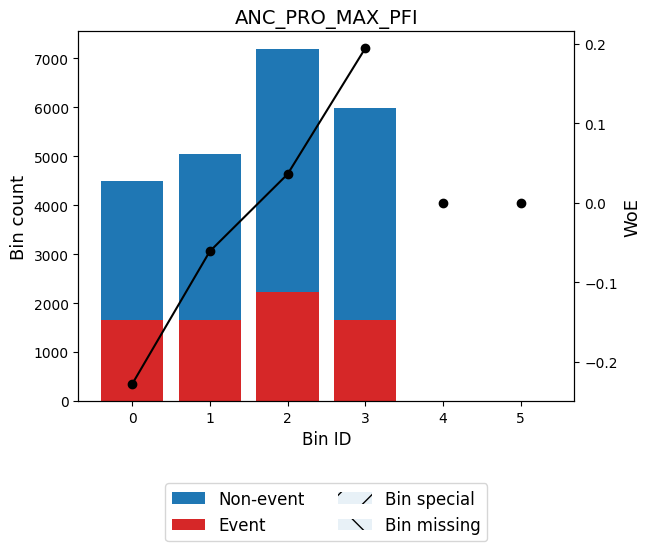

In [148]:
optb.binning_table.plot(metric = "woe")

In [149]:
df['ANC_PRO_MAX_PFI_2'] = optb.transform(df['ANC_PRO_MAX_PFI'], metric="woe")

In [150]:
df_ph['ANC_PRO_MAX_PFI_2'] = optb.transform(df_ph['ANC_PRO_MAX_PFI'], metric = 'bins')

### MT_REST_VIVRE

In [151]:
variable = "MT_REST_VIVRE"
target = "DET"

optb = OptimalBinning(name=variable, dtype="numerical", max_n_bins = 2)

# Ajout des données
optb.fit(df[variable].values, df[target])

optb.binning_table.build()

df['MT_REST_VIVRE'] = optb.transform(df['MT_REST_VIVRE'], metric = 'bins')
df_ph['MT_REST_VIVRE'] = optb.transform(df_ph['MT_REST_VIVRE'], metric = 'bins')

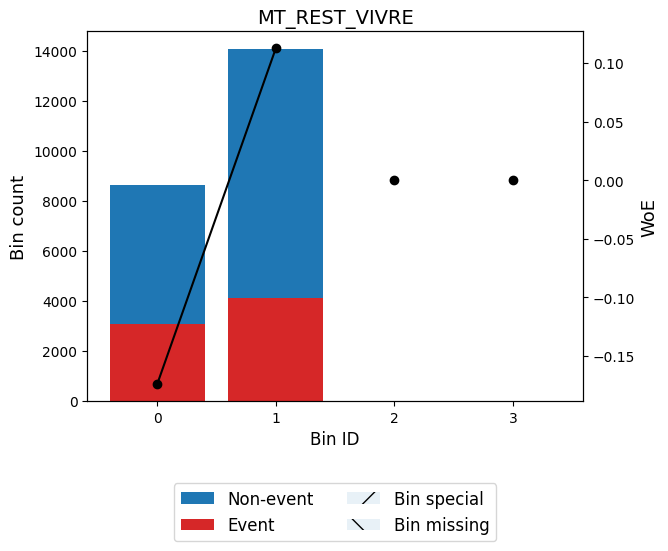

In [152]:
optb.binning_table.plot(metric = "woe")

# Export des Dataframes

In [153]:
df.to_csv('../data/df_logit_xgb.csv', sep = ',')
df_ph.to_csv('../data/df_duree.csv', sep = ',')